<img style="float: right;" src="https://upload.wikimedia.org/wikipedia/commons/f/f5/Best_Buy_Logo.svg" alt="bb logo" width="100"/>

<h1><FONT COLOR=#0000E5>BESTBUY </FONT COLOR=#195071>Televisions</h1>

## 📉 Data Analysis <SPAN STYLE="font-size:18.0pt;font-family:Georgia;">I</span>

In [2]:
import numpy as np
import pandas as pd
import re

In [3]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [4]:
bb = pd.read_csv('python_proj\\bb_clean.csv')
bb = bb.set_index('sku')

In [5]:
bb.columns
#bb.groupby('smart_capable').agg('count')

Index(['color', 'curved', 'display_type', 'energy_KWh', 'height_nostand',
       'manufacturer', 'model_num', 'model_year', 'online_avail', 'refresh_Hz',
       'regular_px', 'resolution', 'review_average', 'review_count', 'sale_px',
       'size_class', 'screen_size', 'smart_capable', 'store_avail',
       'sub_class', 'top_class', 'tv_name', 'warranty_yrs', 'weight_nostand',
       'width', 'bezel'],
      dtype='object')

<h2>Basic Market Proportions with <FONT COLOR=#FF0000>Pie Charts</FONT COLOR=#FF0000></h2>

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
%matplotlib inline

In [8]:
pie_type = bb['display_type'].value_counts().to_frame().T
pie_size = bb['size_class'].value_counts().to_frame().T
pie_curv = bb['curved'].value_counts().to_frame().T
pie_rfsh = bb['refresh_Hz'].value_counts().to_frame().T
pie_smrt = bb['smart_capable'].value_counts().to_frame().T
pie_warr = bb['warranty_yrs'].value_counts().to_frame().T

In [9]:
# Set Seaborn color palette
n_plots = 4
sns.set_palette(sns.color_palette("cividis", n_plots), n_plots)

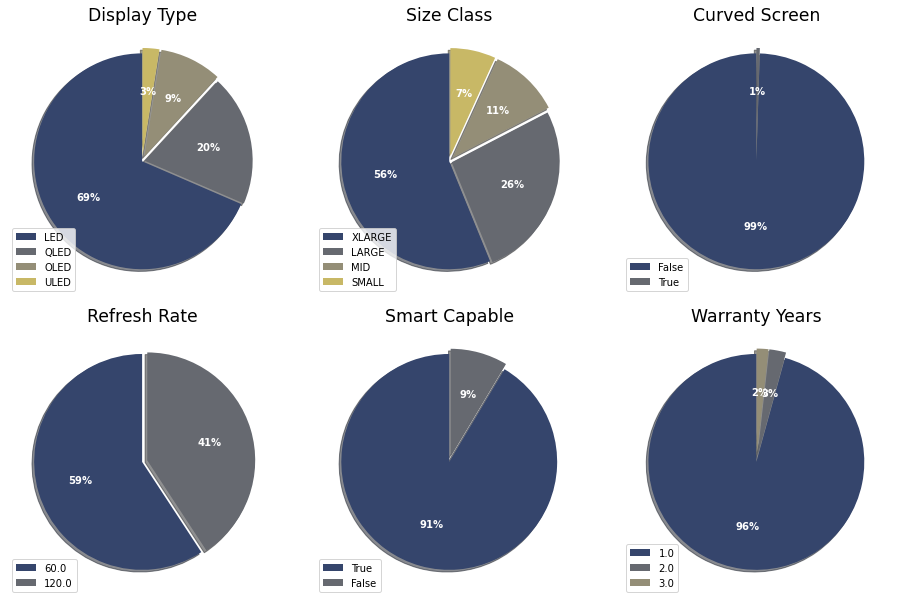

In [10]:
fig, ax = plt.subplots(nrows=2, ncols=3, figsize=(13, 8.5))

explode2 = (0, 0.05)
explode3 = (0, 0.05, 0.05)
explode4 = (0, 0.025, 0.05, 0.05)

plt.title('TV market Proportions')
plt.tight_layout()

# Chart Contents
ax[0,0].pie(pie_type.iloc[0], startangle=90, textprops=dict(color="w",fontweight='extra bold'),
            autopct='%1.f%%', explode=explode4, shadow=True)
ax[0,0].set_title('Display Type', fontweight='light', fontsize='xx-large')
ax[0,1].pie(pie_size.iloc[0], startangle=90, textprops=dict(color="w",fontweight='extra bold'), 
            autopct='%1.f%%', explode=explode4, shadow=True)
ax[0,1].set_title('Size Class', fontweight='light', fontsize='xx-large')
ax[0,2].pie(pie_curv.iloc[0], startangle=90, textprops=dict(color="w",fontweight='extra bold'), 
            autopct='%1.f%%', explode=explode2, shadow=True)
ax[0,2].set_title('Curved Screen', fontweight='light', fontsize='xx-large')
ax[1,0].pie(pie_rfsh.iloc[0], startangle=90, textprops=dict(color="w",fontweight='extra bold'), 
            autopct='%1.f%%', explode=explode2, shadow=True)
ax[1,0].set_title('Refresh Rate', fontweight='light', fontsize='xx-large')
ax[1,1].pie(pie_smrt.iloc[0], startangle=90, textprops=dict(color="w",fontweight='extra bold'), 
            autopct='%1.f%%', explode=explode2, shadow=True)
ax[1,1].set_title('Smart Capable', fontweight='light', fontsize='xx-large')
ax[1,2].pie(pie_warr.iloc[0], startangle=90, textprops=dict(color="w",fontweight='extra bold'), 
            autopct='%1.f%%', explode=explode3, shadow=True)
ax[1,2].set_title('Warranty Years', fontweight='light', fontsize='xx-large')

# Chart Labels
ax[0,0].legend(loc=3, labels=pie_type.columns, fontsize='medium')
ax[0,1].legend(loc=3, labels=pie_size.columns, fontsize='medium')
ax[0,2].legend(loc=3, labels=pie_curv.columns, fontsize='medium')
ax[1,0].legend(loc=3, labels=pie_rfsh.columns, fontsize='medium')
ax[1,1].legend(loc=3, labels=pie_smrt.columns, fontsize='medium')
ax[1,2].legend(loc=3, labels=pie_warr.columns, fontsize='medium')

#fig.suptitle('The TV market', fontsize=18, y=1, fontweight='normal', x=0.1)
fig.tight_layout()

#fig.savefig('xxx')

plt.show()

<h2>Brand products segmented by <FONT COLOR=#FF0000>Screen Size</FONT COLOR=#FF0000></h2>

- The query below shows total # of products sold by each brand

In [11]:
bb.groupby(['manufacturer']).agg('count')['tv_name'].sort_values(ascending=False)

manufacturer
Samsung      115
LG            83
Sony          49
Others        39
TCL           33
VIZIO         30
Hisense       25
Insignia™     23
Name: tv_name, dtype: int64

### Total product percentages

In [12]:
# calculate product # percentages

brands_pct = bb[['manufacturer']].copy()
brands_pct = brands_pct['manufacturer'].value_counts(normalize=True).to_frame()
brands_pct.rename(columns={'manufacturer': 'manuf_ALL'}, inplace=True)
brands_pct

,manuf_ALL
Samsung,0.289673
LG,0.209068
Sony,0.123426
Others,0.098237
TCL,0.083123
VIZIO,0.075567
Hisense,0.062972
Insignia™,0.057935


### Size class segmented percentages
- The below calculates product percentages split by "size_class" and merges onto previous DF

In [16]:
brands_bysize = bb[['size_class','manufacturer']].copy()
for SIZE in ['XLARGE','LARGE','MID','SMALL']:
    brands_pct = brands_pct.merge(brands_bysize.groupby('size_class')['manufacturer']\
                                  .value_counts(normalize=True).loc[SIZE].to_frame()\
                                  , how='left', left_index=True, right_index=True)
    brands_pct.rename(columns={'manufacturer': 'manuf_'+SIZE}, inplace=True)

In [14]:
n_plots = 8
sns.set_palette(sns.color_palette("cividis", n_plots), n_plots)
#sns.set_palette(reversed(sns.color_palette("cividis", n_plots)), n_plots)

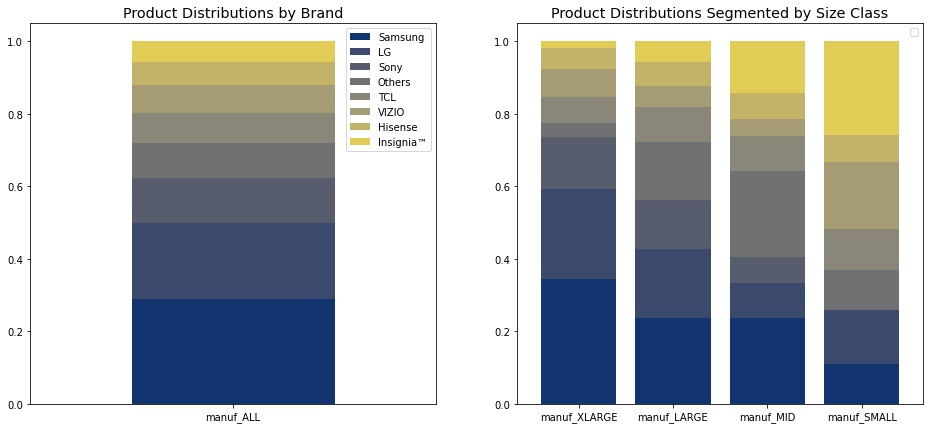

In [19]:
fig, axes = plt.subplots(figsize=(16, 7), nrows=1, ncols=2)
#fig.tight_layout()
brands_pct[['manuf_ALL']].T.plot(ax=axes[0], kind='bar', rot=0, stacked=True).legend(bbox_to_anchor=(1.0, 1.0))
axes[0].set_title('Product Distributions by Brand', fontweight='light', fontsize='x-large')
brands_pct[['manuf_XLARGE','manuf_LARGE','manuf_MID','manuf_SMALL']].T\
            .plot(ax=axes[1], kind='bar', rot=0, stacked=True, width=0.8).legend('')
axes[1].set_title('Product Distributions Segmented by Size Class', fontweight='light', fontsize='x-large')

#save file for Presentation
fig.savefig('temp.png', transparent=True)

<h2>What can we say about <FONT COLOR=#FF0000>Sales</FONT COLOR=#FF0000> &
    <FONT COLOR=#FF0000>Marketshare</FONT COLOR=#FF0000>?</h2>

Unfortunately we can't scrape sales data, so lets use "review counts" as a proxy<br> 
&emsp; (as most bestbuy reviews have "verified purchase" marks)

In [85]:
# calculate product review_count by manufacturer

brands_revcount = bb[['manufacturer','review_count','size_class']].copy()
brands_revpcts = brands_revcount['manufacturer'].value_counts(normalize=True).to_frame()
brands_revpcts['Reviews'] = brands_revcount.groupby('manufacturer').review_count.sum().sort_values(ascending=False).to_frame()
#brands_revpcts.rename(columns={'review_count':'ALL'}, inplace=True)

In [87]:
# calculate product review_count by manufacturer segmented by size class

for SIZE in ['XLARGE','LARGE','MID','SMALL']:
    brands_revpcts = brands_revpcts.merge(brands_revcount.groupby(['size_class','manufacturer']).review_count.sum()\
                                          .loc[SIZE].to_frame(),
                                          how='left', left_index=True, right_index=True)
    brands_revpcts.rename(columns={'review_count':SIZE}, inplace=True)

In [91]:
# Normalize to percentages
brands_revpcts = brands_revpcts.apply(lambda row: row/row.sum())

In [115]:
brands_revpcts

,manufacturer,Reviews,XLARGE,LARGE,MID,SMALL
Samsung,0.289673,0.345388,0.437966,0.346550,0.347503,0.042743
LG,0.209068,0.143565,0.211780,0.103484,0.076336,0.104192
Sony,0.123426,0.112551,0.192232,0.091965,0.043785,NaN
Others,0.098237,0.053006,0.008927,0.073794,0.078738,0.114962
TCL,0.083123,0.107943,0.037425,0.162789,0.095026,0.244792
VIZIO,0.075567,0.051046,0.054199,0.015860,0.006330,0.177306
Hisense,0.062972,0.029564,0.045574,0.020351,0.019916,0.010807
Insignia™,0.057935,0.156937,0.011898,0.185207,0.332366,0.305198


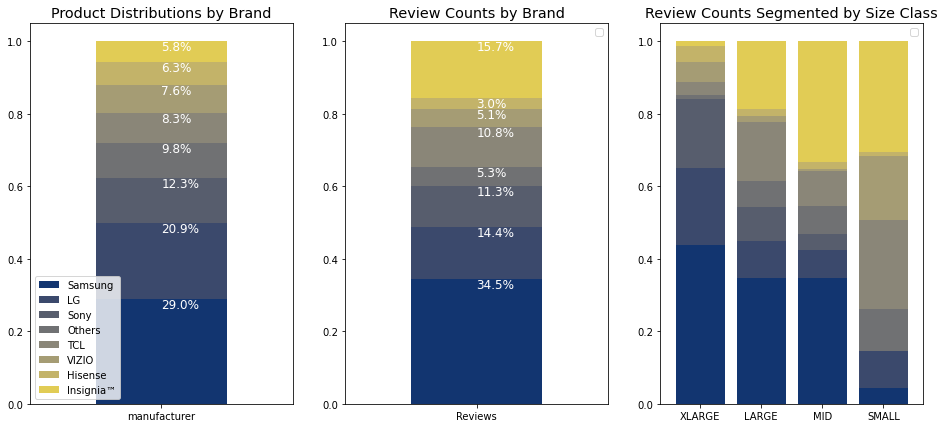

In [120]:
fig, axes = plt.subplots(figsize=(16, 7), nrows=1, ncols=3)
#fig.tight_layout()

brands_revpcts[['manufacturer']].T.plot(ax=axes[0], kind='bar', rot=0, stacked=True)
axes[0].set_title('Product Distributions by Brand', fontweight='light', fontsize='x-large')
brands_revpcts[['Reviews']].T.plot(ax=axes[1], kind='bar', rot=0, stacked=True).legend('')
axes[1].set_title('Review Counts by Brand', fontweight='light', fontsize='x-large')
brands_revpcts[['XLARGE','LARGE','MID','SMALL']].T.plot(ax=axes[2], 
                                                    kind='bar', rot=0, stacked=True, width=0.8).legend('')
axes[2].set_title('Review Counts Segmented by Size Class', fontweight='light', fontsize='x-large')

# Labels
accum = 0
for each in brands_revpcts.manufacturer:
    accum += each
    axes[0].text(0,accum-0.025,f'{round(each*100,1)}%',color='w',fontsize=12)
accum = 0
for each in brands_revpcts.Reviews:
    accum += each
    axes[1].text(0,accum-0.025,f'{round(each*100,1)}%',color='w',fontsize=12)



#save file for Presentation
fig.savefig('temp.png', transparent=True)

Take a look at sales per product
- create a new column as **"revcount_pp"**, showing the avg review count per product for each manufacturer

In [122]:
# To calculate avg review_count per product
reviews = bb.groupby('manufacturer').agg('count')['tv_name'].to_frame()    # total product count by brand
reviews = reviews.merge(bb.groupby(['manufacturer']).agg('sum')['review_count'].to_frame(),
                              how='left', left_index=True, right_index=True)  # total review counts by brand
reviews.columns = ['prod_ALL','rev_ALL']
# avg review count per product = product_count / review_count
reviews['revpp_ALL'] = round(reviews['rev_ALL'] / reviews['prod_ALL'],2)

for SIZE in ['XLARGE','LARGE','MID','SMALL']:
    # for EACH size_class
    # merge in product count by brand  
    reviews = reviews.merge(brands_bysize.groupby('size_class')['manufacturer']\
                                  .value_counts().loc[SIZE].to_frame(), how='left', left_index=True, right_index=True)
    reviews.rename(columns={'manufacturer': 'prod_'+SIZE}, inplace=True)
    # merge in review counts by brand
    reviews = reviews.merge(bb.groupby(['size_class','manufacturer']).agg('sum').loc[SIZE]['review_count']\
                            .to_frame(), how='left', left_index=True, right_index=True)
    reviews.rename(columns={'review_count': 'rev_'+SIZE}, inplace=True)
    # calculate averge per product
    reviews['revpp_'+SIZE] = round(reviews['rev_'+SIZE] / reviews['prod_'+SIZE],2)

In [123]:
reviews = reviews.sort_values(by='prod_ALL', ascending=False)

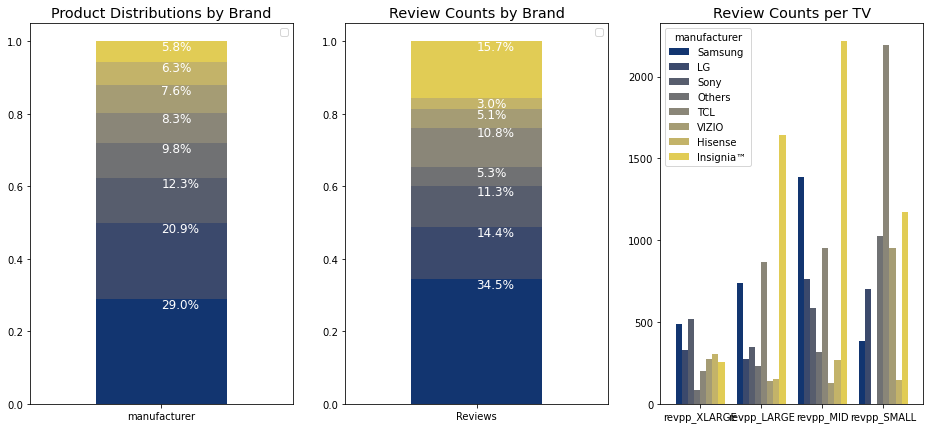

In [127]:
fig, axes = plt.subplots(figsize=(16, 7), nrows=1, ncols=3)
#fig.tight_layout()
brands_revpcts[['manufacturer']].T.plot(ax=axes[0], kind='bar', rot=0, stacked=True).legend('')
axes[0].set_title('Product Distributions by Brand', fontweight='light', fontsize='x-large')
brands_revpcts[['Reviews']].T.plot(ax=axes[1], kind='bar', rot=0, stacked=True).legend('')
axes[1].set_title('Review Counts by Brand', fontweight='light', fontsize='x-large')
brands_revpcts[['XLARGE','LARGE','MID','SMALL']].T.plot(ax=axes[2], 
                                                    kind='bar', rot=0, stacked=True, width=0.8).legend('')

reviews[['revpp_XLARGE','revpp_LARGE','revpp_MID','revpp_SMALL']].T\
            .plot(ax=axes[2], rot=0, kind='bar', width=0.8)
axes[2].set_title('Review Counts per TV', fontweight='light', fontsize='x-large')

# Labels
accum = 0
for each in brands_revpcts.manufacturer:
    accum += each
    axes[0].text(0,accum-0.025,f'{round(each*100,1)}%',color='w',fontsize=12)
accum = 0
for each in brands_revpcts.Reviews:
    accum += each
    axes[1].text(0,accum-0.025,f'{round(each*100,1)}%',color='w',fontsize=12)

#save file for Presentation
fig.savefig('temp.png', transparent=True)

#### The # of reviews per TV for Bestbuy's Insignia overshadows most other brands in each size class (except XLARGE)
- May represent preferential treatment for their own TVs